In [30]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Impor model-model klasifikasi
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Muat data lagi untuk memastikan kita mulai dari awal
df_encoded = pd.read_csv('heart_desease_data.csv')

# Terapkan One-Hot Encoding pada fitur kategorikal
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Sekarang, pisahkan lagi X dan Y dari DataFrame yang sudah di-encode
X_encoded = df_encoded.drop(columns='target', axis=1)
Y_encoded = df_encoded['target']

# Selanjutnya, Anda bisa melanjutkan proses scaling, splitting, dan training
# pada X_encoded dan Y_encoded ini.
print("Shape data setelah One-Hot Encoding:", X_encoded.shape)

Shape data setelah One-Hot Encoding: (303, 30)


In [32]:
# Pastikan file 'heart_desease_data.csv' sudah ada di sesi Colab
df = pd.read_csv('heart_desease_data.csv')

# Pisahkan fitur (X) dan target (Y)
X = df.drop(columns='target', axis=1)
Y = df['target']

# Lakukan penskalaan fitur (Penting untuk Logistic Regression dan SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<Axes: >

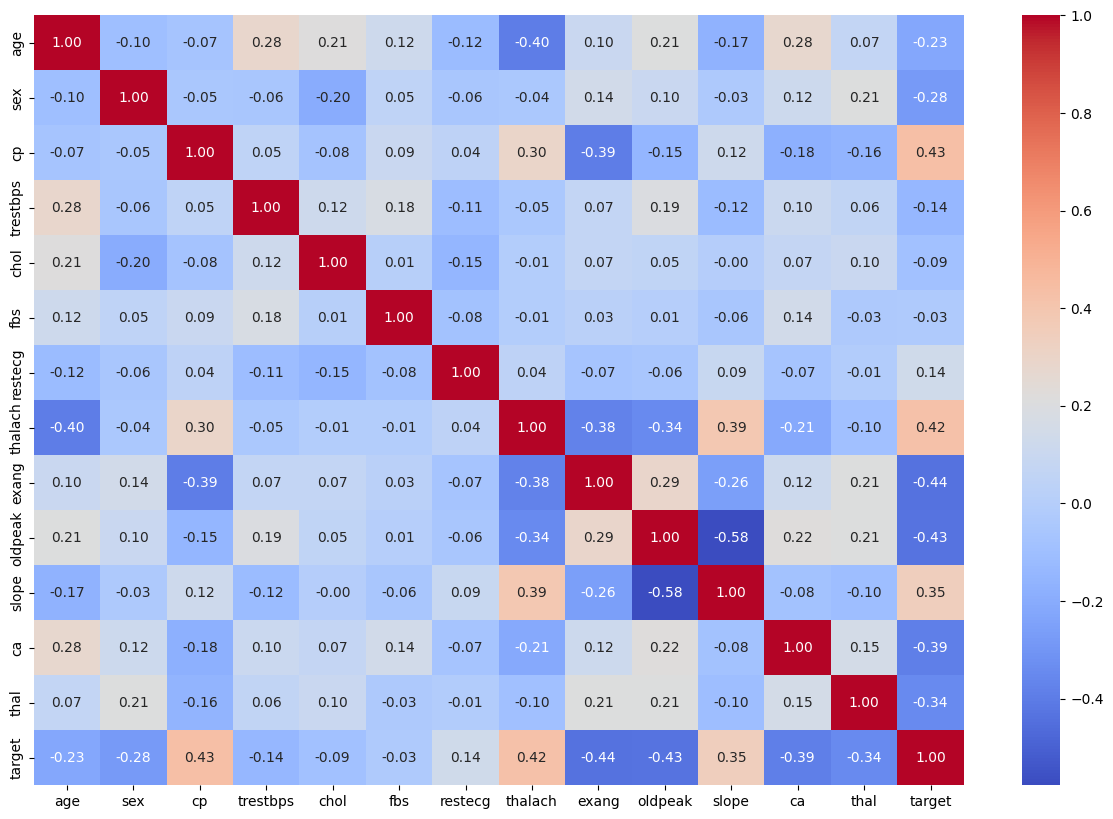

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


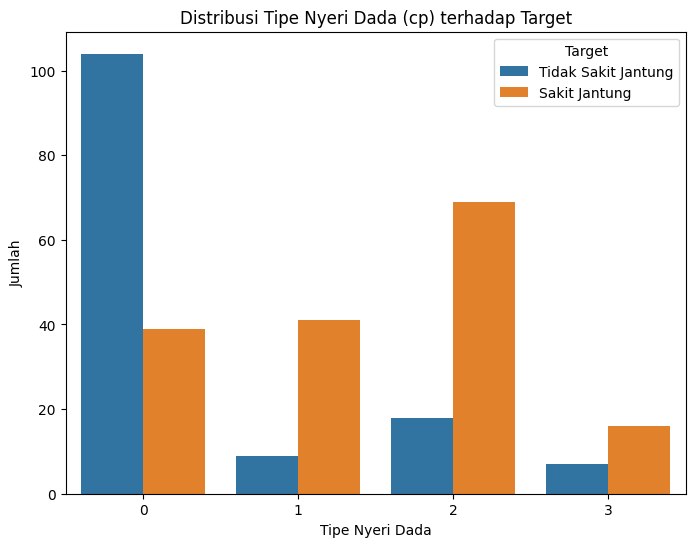

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df, hue='target')
plt.title('Distribusi Tipe Nyeri Dada (cp) terhadap Target')
plt.xlabel('Tipe Nyeri Dada')
plt.ylabel('Jumlah')
plt.legend(title='Target', labels=['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.show()

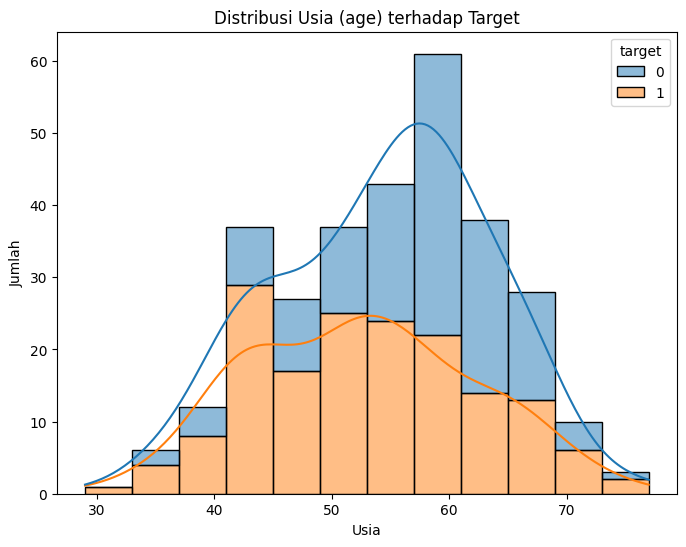

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, multiple='stack')
plt.title('Distribusi Usia (age) terhadap Target')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Latih GridSearchCV pada data latih Anda
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(grid_search.best_params_)

# Gunakan model terbaik untuk prediksi dan evaluasi
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\nAkurasi setelah Hyperparameter Tuning:")
print(accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Parameter terbaik yang ditemukan:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}

Akurasi setelah Hyperparameter Tuning:
0.8688524590163934


In [37]:
# Kode ini menggunakan variabel 'best_rf_model' dari cell sebelumnya
# dan variabel 'X_scaled' serta 'Y' dari cell persiapan data

cv_scores = cross_val_score(best_rf_model, X_scaled, Y, cv=10)

print("Hasil Akurasi dari 10-Fold Cross-Validation:")
print(cv_scores)
print("\n" + "="*40)
print(f"Akurasi Rata-rata: {cv_scores.mean() * 100:.2f}%")
print(f"Standar Deviasi: {cv_scores.std():.4f}")

Hasil Akurasi dari 10-Fold Cross-Validation:
[0.90322581 0.83870968 0.87096774 0.9        0.9        0.8
 0.83333333 0.86666667 0.73333333 0.8       ]

Akurasi Rata-rata: 84.46%
Standar Deviasi: 0.0522


In [38]:
# Inisialisasi semua model
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest": RandomForestClassifier(random_state=2)
}

In [39]:
# Latih dan evaluasi setiap model
# Buat list untuk menyimpan hasil
results = []

for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan hasil
    results.append({
        "Model": name,
        "Akurasi": accuracy,
        "Presisi": precision,
        "Recall": recall,
        "F1-Score": f1
    })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Tampilkan hasil dalam bentuk tabel perbandingan
results_df = pd.DataFrame(results)

# Urutkan berdasarkan akurasi dari yang tertinggi
results_df_sorted = results_df.sort_values(by="Akurasi", ascending=False).reset_index(drop=True)

print("Tabel Perbandingan Kinerja Model")
print("="*40)
print(results_df_sorted)

Tabel Perbandingan Kinerja Model
                    Model   Akurasi   Presisi   Recall  F1-Score
0     Logistic Regression  0.885246  0.878788  0.90625  0.892308
1             Naive Bayes  0.868852  0.900000  0.84375  0.870968
2           Random Forest  0.868852  0.852941  0.90625  0.878788
3           Decision Tree  0.852459  0.925926  0.78125  0.847458
4  Support Vector Machine  0.704918  0.666667  0.87500  0.756757


In [41]:
# Asumsikan 'best_rf_model' adalah model terbaik dari GridSearchCV
# Asumsikan 'scaler' adalah objek StandardScaler yang sudah di-fit
joblib.dump(best_rf_model, "model_jantung.sav")
joblib.dump(scaler, "scaler_jantung.sav")

print("Model dan Scaler berhasil disimpan!")

Model dan Scaler berhasil disimpan!
